In [153]:
# import the modules
import numpy as np
import pandas as pd
import collections
#Stat and math
from math import sqrt
from scipy.stats import norm,skew

import warnings
warnings.filterwarnings("ignore")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Processing 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Impute
from sklearn.impute import SimpleImputer

#Pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# Model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


#Linear
from sklearn.linear_model import LinearRegression, Lasso, Ridge
#Logistic
from sklearn.linear_model import LogisticRegression
#Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Evaluation metric
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, roc_auc_score



### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [154]:
# Code starts here
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')
print(Train.shape)
Train.head(5)


(7662, 16)


,Id,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,6269,LA006270,Yes,debt_consolidation,12.53%,689.41,11.513725,14.45,722,4291.000000,13171,51.8,0,Less than 5,No,Yes
1,1460,LA001461,Yes,credit_card,10.20%,485.42,10.315597,12.87,752,5789.958333,14857,31.3,0,Less than 5,Yes,Yes
2,5539,LA005540,Yes,debt_consolidation,12.87%,121.08,11.238436,1.58,692,3391.000000,12135,85.5,0,Less than 5,No,Yes
3,9020,LA009021,No,all_other,15.37%,348.47,11.142007,11.01,687,5370.000000,10631,35.3,0,Less than 10,No,Yes
4,4365,LA004366,Yes,debt_consolidation,14.61%,344.76,10.308953,11.36,672,2429.958333,10544,57.0,0,Less than 5,Yes,Yes


In [155]:
train=Train.drop(columns={'Id','customer.id'})
test=Test.drop(columns={'Id','customer.id'})
print('train:',train.shape)
print('test:',test.shape)

train: (7662, 14)
test: (1916, 13)


In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7662 non-null   object 
 1   purpose            7662 non-null   object 
 2   int.rate           7662 non-null   object 
 3   installment        7662 non-null   float64
 4   log.annual.inc     7662 non-null   float64
 5   dti                7662 non-null   float64
 6   fico               7662 non-null   int64  
 7   days.with.cr.line  7662 non-null   float64
 8   revol.bal          7662 non-null   int64  
 9   revol.util         7662 non-null   float64
 10  pub.rec            7662 non-null   int64  
 11  inq.last.6mths     7662 non-null   object 
 12  delinq.2yrs        7662 non-null   object 
 13  paid.back.loan     7662 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 838.2+ KB


In [157]:
train.describe()

,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec
count,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000
mean,318.073414,10.927664,12.628104,710.626990,4556.132167,16801.462151,46.674093,0.061342
std,207.121270,0.619736,6.856764,37.919831,2492.455086,32315.194429,28.956386,0.260323
min,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000,0.000000,0.000000
25%,163.570000,10.545447,7.212500,682.000000,2819.958333,3163.250000,22.600000,0.000000
50%,267.735000,10.925938,12.705000,707.000000,4113.520834,8538.500000,46.000000,0.000000
75%,430.910000,11.289782,17.940000,737.000000,5739.239583,18144.250000,70.700000,0.000000
max,940.140000,14.528354,29.960000,827.000000,17616.000000,952013.000000,119.000000,5.000000


In [158]:
train['int.rate'] = train['int.rate'].str.replace('%', '')
test['int.rate'] = test['int.rate'].str.replace('%', '')
train = train.astype({"int.rate": float})
test = test.astype({"int.rate": float})

In [159]:
train.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

### Encoding Yes=1 No=0

In [160]:
train.loc[train['paid.back.loan']=='Yes', 'paid.back.loan'] = 1
train.loc[train['paid.back.loan']=='No', 'paid.back.loan'] = 0

train.loc[train['credit.policy']=='Yes', 'credit.policy'] = 1
train.loc[train['credit.policy']=='No', 'credit.policy'] = 0

train.loc[train['delinq.2yrs']=='Yes', 'delinq.2yrs'] = 1
train.loc[train['delinq.2yrs']=='No', 'delinq.2yrs'] = 0

test.loc[test['credit.policy']=='Yes', 'credit.policy'] = 1
test.loc[test['credit.policy']=='No', 'credit.policy'] = 0

test.loc[test['delinq.2yrs']=='Yes', 'delinq.2yrs'] = 1
test.loc[test['delinq.2yrs']=='No', 'delinq.2yrs'] = 0


## Visualize the data
Check for the categorical & continuous features.
Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
Clean the data, apply some data preprocessing and engineering techniques.

In [161]:
### Catagorical and numerical column

cat_col = [col for col in train.columns 
                       if train[col].dtype.name == 'object']
num_col = [col for col in train.columns 
                     if train[col].dtype.name != 'object']

print('categorical_columns:', cat_col)
print('numerical_columns:', num_col)

categorical_columns: ['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs', 'paid.back.loan']
numerical_columns: ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'pub.rec']


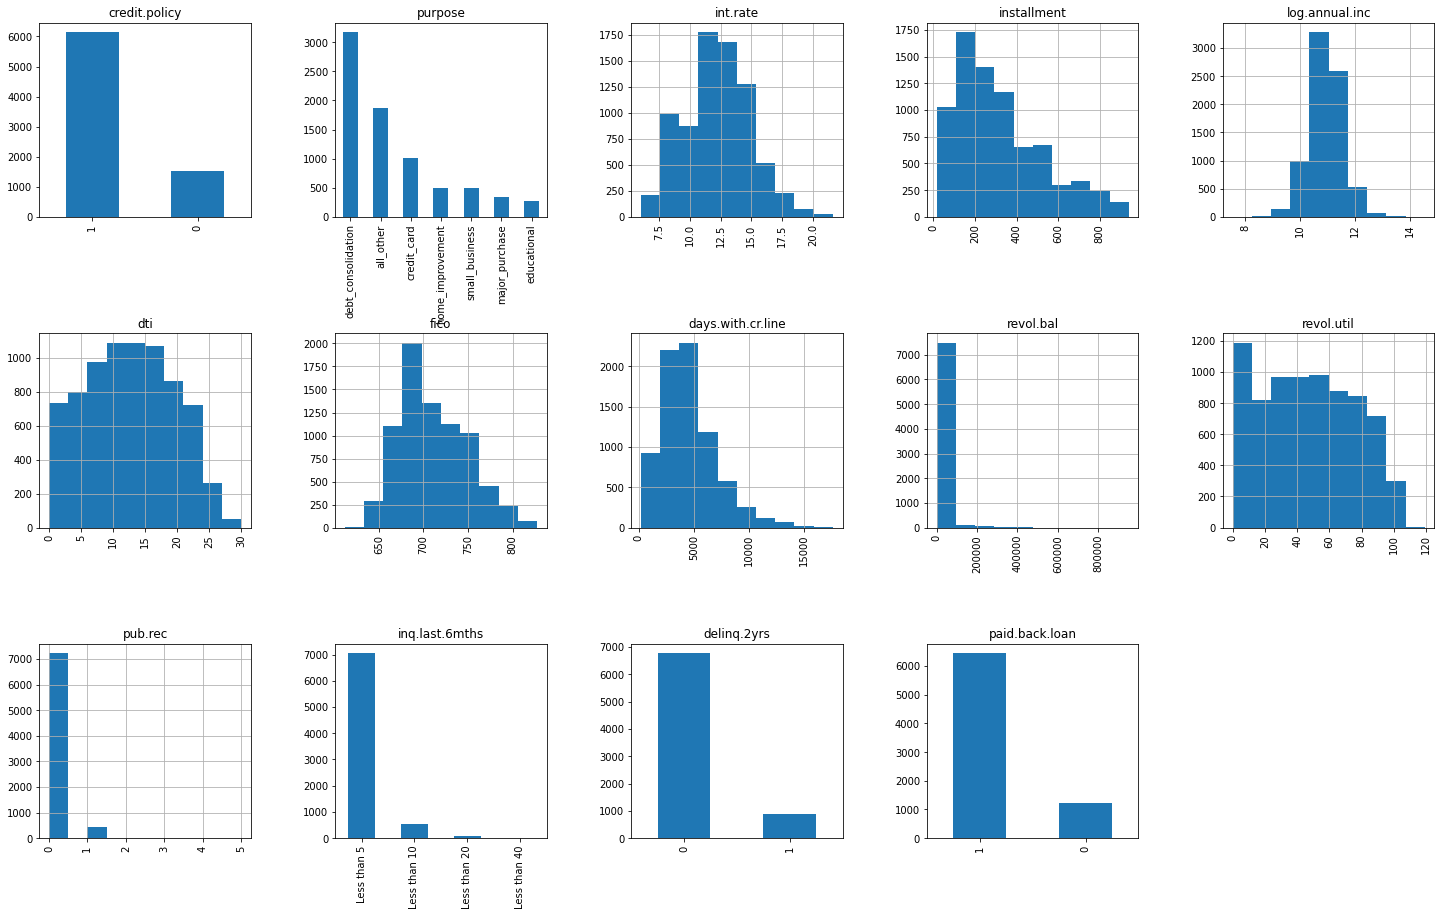

In [162]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(train.shape[1]) / cols)
for i, column in enumerate(train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if train.dtypes[column] == np.object:
        train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.6, wspace=0.4)

In [163]:
le = LabelEncoder()

for x in cat_col:
    train[x] = le.fit_transform(train[x])
    if x in [c for c in test.columns 
                       if test[c].dtype.name == 'object']:
        test[x] = le.transform(test[x])
      

In [164]:
train['inq.last.6mths'].unique()

array([3, 0, 2, 1])

### Model building

- Separate the features and target.
- Now let's come to the actual task, using Decision Tree, predict the `paid.back.loan`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [165]:
# Code Starts here
X = train.iloc[:, :-1]
y = train.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=0)

In [166]:
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X_train, y_train)

dt_predictions = dt.predict(X_val) 
print("Decision tree accuracy: ",accuracy_score(y_val,dt_predictions))

Decision tree accuracy:  0.8351457155284906


In [167]:
tree_params = {'max_depth': range(2,15)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=0),
                                 tree_params, cv=5)                  


locally_best_tree.fit(X_train, y_train)

print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

Best params: {'max_depth': 2}
Best cross validaton score 0.8402011378336649


In [168]:
dt_tune = DecisionTreeClassifier(max_depth=2, random_state=0)
dt_tune.fit(X_train, y_train)
dt_tune_predictions = dt_tune.predict(X_val)
print("Auracy after tuning: ",accuracy_score(y_val, dt_tune_predictions))

Auracy after tuning:  0.8412353197042193


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [171]:
# Code Starts here
# Storing the id from the test file
id_ = Test['Id']

# Predict on the test data
y_pred_test = dt_tune.predict(test)

# Create a sample submission file
final_submission = pd.DataFrame({'Id':id_,'paid.back.loan':y_pred_test})

final_submission.loc[final_submission['paid.back.loan']==1, 'paid.back.loan'] = 'Yes'
final_submission.loc[final_submission['paid.back.loan']==0, 'paid.back.loan'] = 'No'

# Convert the sample submission file into a csv file
final_submission.to_csv('final_submission.csv',index=False)



# Code ends here

In [172]:
final_submission

,Id,paid.back.loan
0,5468,Yes
1,7530,Yes
2,501,Yes
3,2690,Yes
4,3691,Yes
...,...,...
1911,1912,Yes
1912,8342,Yes
1913,7898,Yes
1914,4288,Yes
